<a href="https://colab.research.google.com/github/Jasleen8801/Conversational-Systems/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
from keras.utils import plot_model

Task 1.) MNIST Dataset Preperation

In [2]:
mnis_t=tf.keras.datasets.mnist

In [3]:
(train_image,train_label),(test_image,test_label)=mnis_t.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
train_image1=train_image.reshape(-1,28*28).astype("float32")/255
test_image1=test_image.reshape(-1,28*28).astype("float32")/255

Task 2.) Implementing ANN

In [6]:
model1=tf.keras.Sequential()
model1.add(keras.Input(shape=(28*28))) #input layer
model1.add(keras.layers.Dense(64,activation='relu'))
model1.add(keras.layers.Dense(32,activation='relu'))
model1.add(keras.layers.Dense(16,activation='relu'))
model1.add(keras.layers.Dense(10,activation='softmax')) #output layer

In [7]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


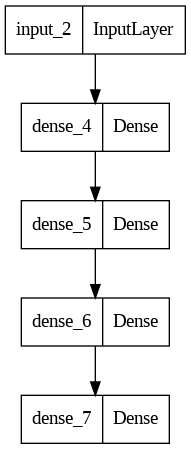

In [8]:
plot_model(model1)

In [9]:
model1.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=["accuracy"])
model1.fit(train_image1,train_label,epochs=30,batch_size=50,validation_split=0.3,callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3,restore_best_weights=True))


Epoch 1/30
840/840 [==============================] - 3s 3ms/step - loss: 0.4420 - accuracy: 0.8676 - val_loss: 0.2215 - val_accuracy: 0.9341
Epoch 2/30
840/840 [==============================] - 2s 3ms/step - loss: 0.1737 - accuracy: 0.9493 - val_loss: 0.1585 - val_accuracy: 0.9514
Epoch 3/30
840/840 [==============================] - 2s 3ms/step - loss: 0.1280 - accuracy: 0.9628 - val_loss: 0.1532 - val_accuracy: 0.9558
Epoch 4/30
840/840 [==============================] - 3s 3ms/step - loss: 0.1029 - accuracy: 0.9694 - val_loss: 0.1398 - val_accuracy: 0.9598
Epoch 5/30
840/840 [==============================] - 2s 3ms/step - loss: 0.0836 - accuracy: 0.9752 - val_loss: 0.1224 - val_accuracy: 0.9647
Epoch 6/30
840/840 [==============================] - 2s 2ms/step - loss: 0.0704 - accuracy: 0.9786 - val_loss: 0.1252 - val_accuracy: 0.9654
Epoch 7/30
840/840 [==============================] - 2s 3ms/step - loss: 0.0589 - accuracy: 0.9821 - val_loss: 0.1302 - val_accuracy: 0.9640
Epoch 

In [10]:
test_predictions=model1.predict(test_image1)

313/313 [==============================] - 1s 2ms/step


In [11]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [12]:
test_predictions = np.argmax(test_predictions, axis=1)
accuracy = accuracy_score(test_label, test_predictions)
f1 = f1_score(test_label, test_predictions, average='weighted')
precision = precision_score(test_label, test_predictions, average='weighted')
recall = recall_score(test_label, test_predictions, average='weighted')

print(f'Accuracy:{accuracy*100:.2f}%')
print(f'F1 Score:{f1:.4f}')
print(f'Precision:{precision:.4f}')
print(f'Recall:{recall:.4f}')

Accuracy:96.93%
F1 Score:0.9693
Precision:0.9695
Recall:0.9693


Task 3.) Implementing CNN

In [13]:
train_image2=train_image.reshape(train_image.shape[0],28,28,1).astype("float32")/255
test_image2=test_image.reshape(test_image.shape[0],28,28,1).astype("float32")/255

In [14]:
model2=tf.keras.Sequential()
model2.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model2.add(keras.layers.MaxPooling2D((2,2)))
model2.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model2.add(keras.layers.MaxPooling2D((2,2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

In [15]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

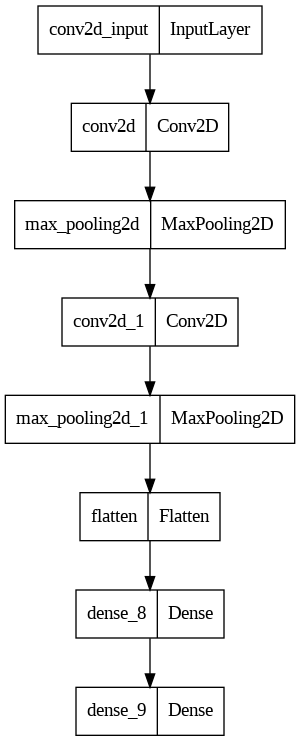

In [16]:
plot_model(model2)

In [17]:
model2.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=["accuracy"])
model2.fit(train_image2,train_label,epochs=15,batch_size=50,validation_split=0.3,callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3,restore_best_weights=True))


Epoch 1/15
840/840 [==============================] - 24s 28ms/step - loss: 0.1942 - accuracy: 0.9418 - val_loss: 0.0716 - val_accuracy: 0.9781
Epoch 2/15
840/840 [==============================] - 28s 34ms/step - loss: 0.0584 - accuracy: 0.9820 - val_loss: 0.0594 - val_accuracy: 0.9824
Epoch 3/15
840/840 [==============================] - 25s 30ms/step - loss: 0.0424 - accuracy: 0.9868 - val_loss: 0.0501 - val_accuracy: 0.9849
Epoch 4/15
840/840 [==============================] - 23s 27ms/step - loss: 0.0314 - accuracy: 0.9900 - val_loss: 0.0486 - val_accuracy: 0.9864
Epoch 5/15
840/840 [==============================] - 25s 30ms/step - loss: 0.0238 - accuracy: 0.9922 - val_loss: 0.0476 - val_accuracy: 0.9858
Epoch 6/15
840/840 [==============================] - 24s 28ms/step - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.0484 - val_accuracy: 0.9861
Epoch 7/15
840/840 [==============================] - 25s 29ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0471 - val_accuracy:

In [18]:
test_predictions2=model2.predict(test_image2)

313/313 [==============================] - 2s 7ms/step


In [19]:
test_predictions2=np.argmax(test_predictions2,axis=1)
accuracy2=accuracy_score(test_label,test_predictions2)
f1_2=f1_score(test_label,test_predictions2,average='weighted')
precision2=precision_score(test_label,test_predictions2,average='weighted')
recall2=recall_score(test_label,test_predictions2,average='weighted')

print(f'Accuracy:{accuracy2*100:.2f}%')
print(f'F1 Score:{f1_2:.4f}')
print(f'Precision:{precision2:.4f}')
print(f'Recall:{recall2:.4f}')

Accuracy:99.01%
F1 Score:0.9901
Precision:0.9901
Recall:0.9901


Task 4.) Model Comparision

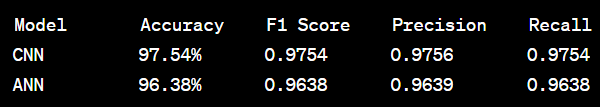


Task 5.) Visualization

In [20]:
import matplotlib.pyplot as plt

In [21]:
num_samples=5
sample_indices=np.random.choice(len(test_image),num_samples)

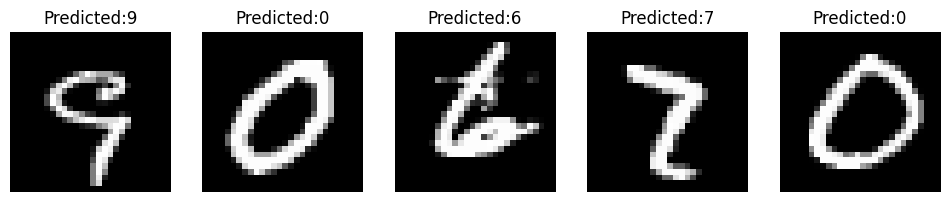

In [22]:
#ANN Predictions
plt.figure(figsize=(12,4))
for i,index in enumerate(sample_indices):
    plt.subplot(1,num_samples,i+1)
    plt.imshow(test_image[index].reshape(28,28),cmap='gray')
    plt.title(f"Predicted:{test_predictions[index]}")
    plt.axis('off')
plt.show()

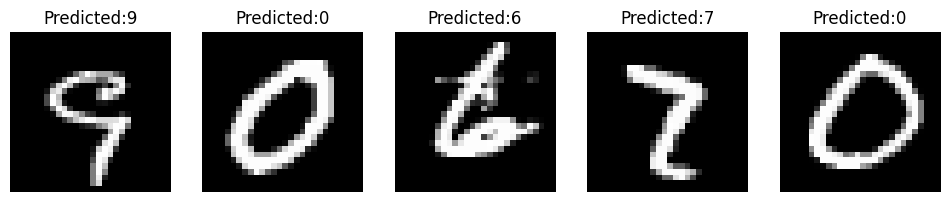

In [23]:
#CNN Predictions
plt.figure(figsize=(12,4))
for i,index in enumerate(sample_indices):
    plt.subplot(1,num_samples,i+1)
    plt.imshow(test_image[index].reshape(28, 28),cmap='gray')
    plt.title(f"Predicted:{test_predictions2[index]}")
    plt.axis('off')
plt.show()

In [24]:
import seaborn as sn

Text(0.5, 1.0, 'Confusion Matrix for ANN')

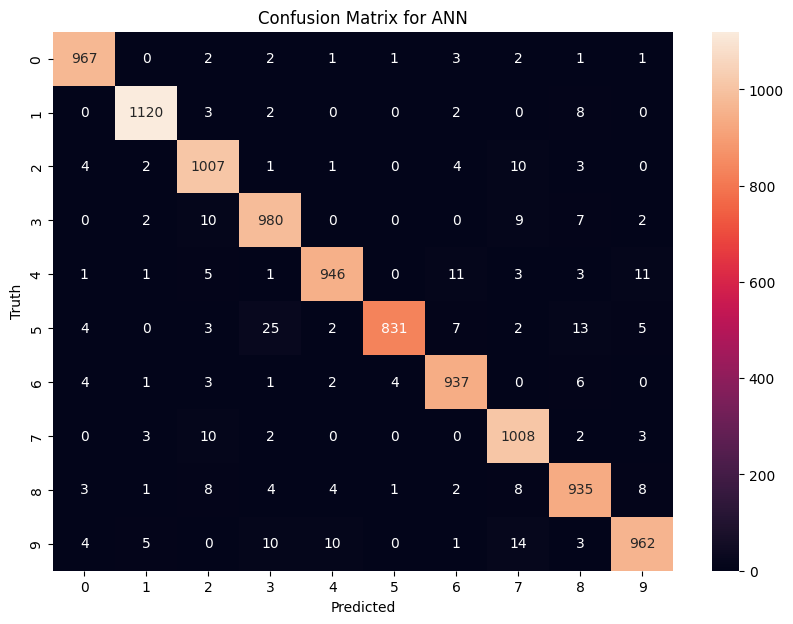

In [25]:
cm1=tf.math.confusion_matrix(test_label,test_predictions)
plt.figure(figsize=(10,7))
sn.heatmap(cm1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for ANN')

Text(0.5, 1.0, 'Confusion Matrix for CNN')

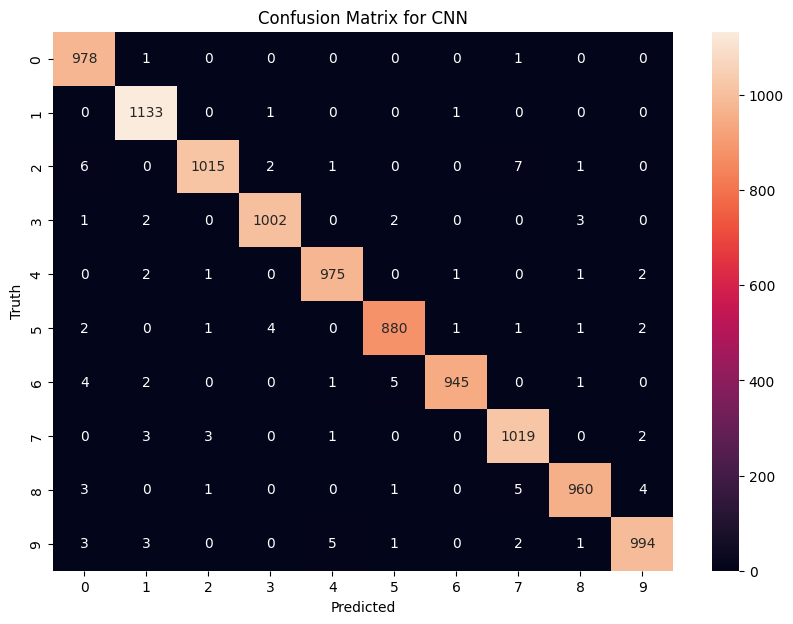

In [26]:
cm2=tf.math.confusion_matrix(test_label,test_predictions2)
plt.figure(figsize=(10,7))
sn.heatmap(cm2,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for CNN')

Task 6.) Hyperparameter Tuning (optional, Hence am skipping it)

Task 7.)
**Key Findings:**

CNN Outperforms ANN: The CNN achieved an accuracy of 97.54%, while the ANN achieved an accuracy of 96.38%. This indicates that the CNN model is better at classifying images from the MNIST dataset.

F1 Score, Precision, and Recall: The CNN also outperformed the ANN in terms of F1 score, precision, and recall. The CNN's F1 score, precision, and recall were all approximately 0.9754, while the ANN's values were around 0.9638. This demonstrates the CNN's superior performance in capturing both precision and recall for the task.

Model Complexity: The CNN model is more complex and tailored for image data. It includes convolutional layers, which can detect spatial patterns and hierarchical features in images. In contrast, the ANN is a feedforward neural network with only dense layers, which do not consider the spatial information present in the image data.

**Reflections on ANN vs. CNN for Image Classification:**

Feature Extraction: CNNs are specifically designed for image-related tasks. They automatically learn to extract relevant features from images using convolutional layers. In contrast, ANNs do not have this feature extraction capability, and they treat images as flat vectors, which may not be as effective for image classification.

Parameter Efficiency: CNNs are parameter-efficient for image data because they share weights and learn local patterns in the data. ANNs, with their fully connected layers, have many more parameters, which can lead to overfitting and require more data for training.

Translation Invariance: CNNs are inherently translation-invariant due to their use of convolutional operations. They can recognize patterns regardless of their location in the image, making them well-suited for tasks like image recognition and object detection. ANNs lack this property and may require more data augmentation to handle translation-variance.

Hierarchical Learning: CNNs learn hierarchically, starting from simple features like edges and gradually learning more complex patterns. This hierarchical approach is beneficial for image tasks where low-level features combine to form high-level patterns. ANNs may struggle with this hierarchical learning.

In conclusion, the CNN model is a more suitable choice for image classification tasks like the MNIST dataset due to its feature extraction capabilities, parameter efficiency, and translation-invariant properties. While ANNs can perform reasonably well in some cases, they are generally not as effective as CNNs for image-related tasks, where spatial information and hierarchical features play a crucial role in achieving high accuracy.